# Introduction to social network project
## Social circles: Facebook 
https://snap.stanford.edu/data/ego-Facebook.html


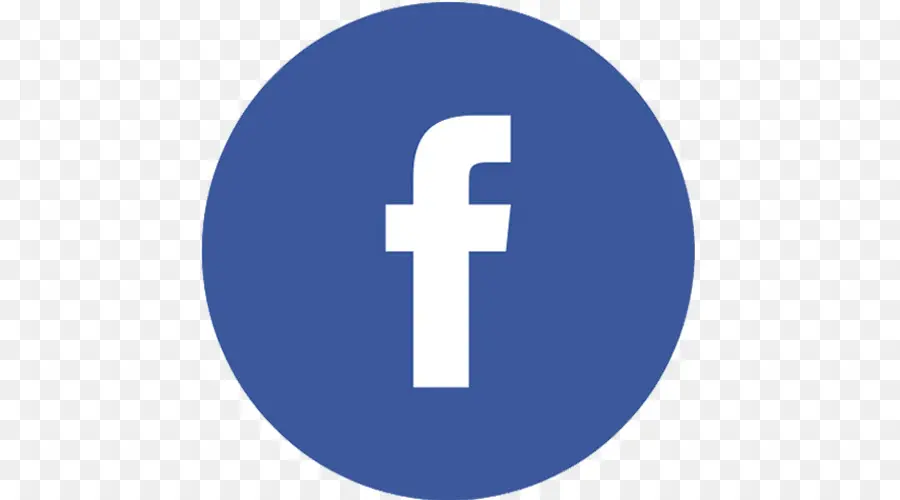

In [1]:
import matplotlib.pyplot as plt
from igraph import Graph,drawing,plot
import random
import pandas as pd
import numpy as np

In [2]:
#load data
file_path = "social circles/facebook_combined.txt"

G = Graph.Read_Edgelist(file_path, directed=False)

#About graph G(N,E):
print(f"Graph has {G.vcount()} nodes and {G.ecount()} edges")


Graph has 4039 nodes and 88234 edges


## Node and average degree

In [3]:
# Degree of each node
degrees = G.degree()

# Format the output as a list of (node, degree) pairs
degree_output = [(i, degrees[i]) for i in range(len(degrees))]
print("Node Degrees:")
for node, degree in degree_output[:10]:
    print(f"Node {node}: Degree {degree}")


Node Degrees:
Node 0: Degree 347
Node 1: Degree 17
Node 2: Degree 10
Node 3: Degree 17
Node 4: Degree 10
Node 5: Degree 13
Node 6: Degree 6
Node 7: Degree 20
Node 8: Degree 8
Node 9: Degree 57


#### Find the node with the highest & lowest degrees

In [4]:
# Find the node with the highest degree
max_degree = max(degrees)
max_degree_node = degrees.index(max_degree)

# Find the node with the lowest degree
min_degree = min(degrees)
min_degree_node = degrees.index(min_degree)

# Print the results
print(f"Node with the highest degree: Node {max_degree_node} with degree {max_degree}")
print(f"Node with the lowest degree: Node {min_degree_node} with degree {min_degree}")


Node with the highest degree: Node 107 with degree 1045
Node with the lowest degree: Node 11 with degree 1


In [5]:
avg_degree = sum(degrees) / len(degrees)
print("Average Degree:", avg_degree)

Average Degree: 43.69101262688784


Being in this network means you will have on average 43 relationships (friends)

## Check Connectivity

In [6]:
# Check connectivity
is_connected = G.is_connected()
print("Graph Connected:", is_connected)

Graph Connected: True


the network/graph is connected, meaning all users are reachable from any other user
wich means thay any user can be reached from any other user via a series of friendships

In [7]:
# Find the connected components of the graph
components = G.connected_components()

# Number of connected components
num_components = len(components)
print(f"Number of connected components: {num_components}")

# Sizes of the connected components
component_sizes = components.sizes()
print(f"Sizes of connected components: {component_sizes}")

# Visualize the largest component
largest_component = components.giant()
print(f"Number of nodes in the largest connected component: {len(largest_component.vs)}")

Number of connected components: 1
Sizes of connected components: [4039]
Number of nodes in the largest connected component: 4039


Nodes with the highest degree centrality are the most connected users in the network.

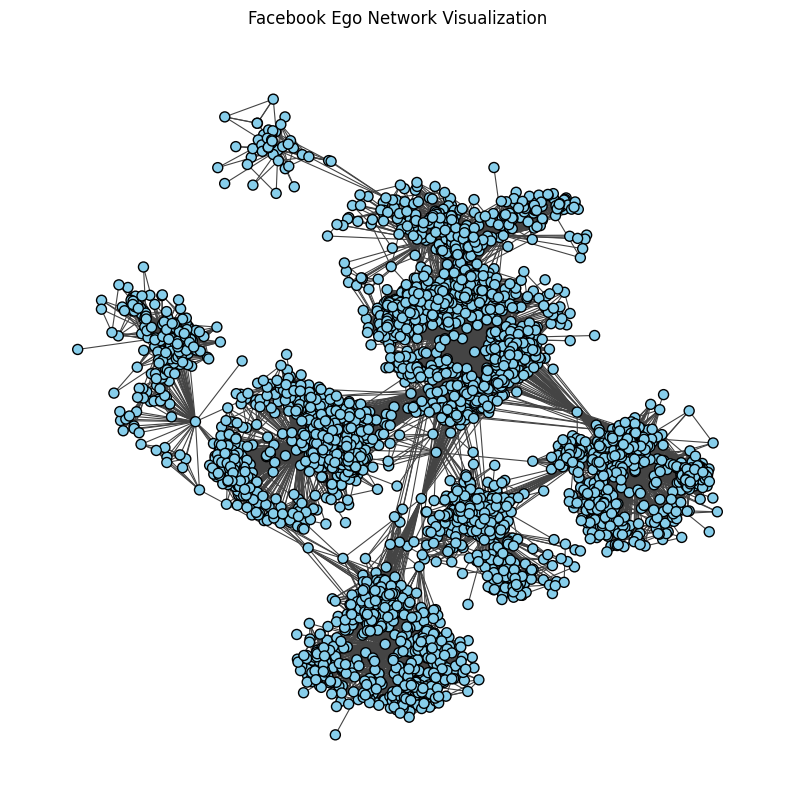

In [8]:
# Set the seed for reproducibility
random.seed(42)
# Layout for the graph
layout = G.layout("fr")

# Set up the plot size
plt.figure(figsize=(10, 10))

# Plot the graph
plot(G, layout=layout, target=plt.gca(), vertex_size=10, vertex_color='skyblue', 
     edge_width=0.8, bbox=(0, 0, 1, 1), margin=50)

# Set title of the plot then display it
plt.title("Facebook Ego Network Visualization")
plt.show()

## Quantyfing the network

### degree distribution

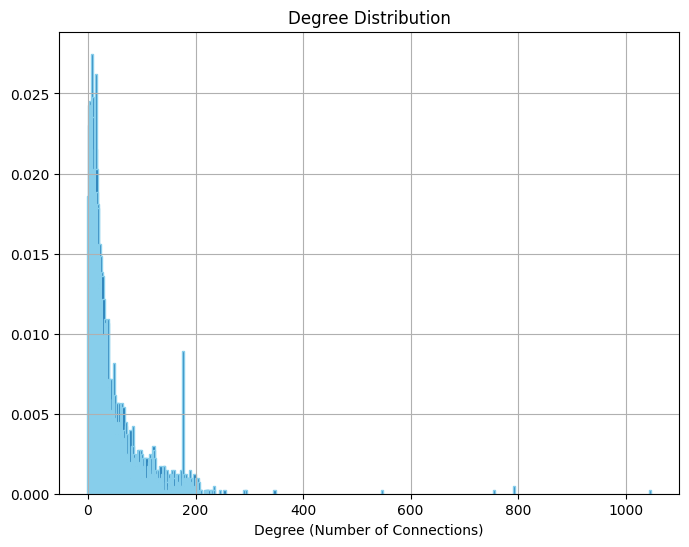

In [9]:
# Calculate the degrees of all nodes
degrees = G.degree()

# Normalize the degree distribution by dividing frequency by the total number of nodes
total_nodes = G.vcount()  # Correct way to get the number of nodes in igraph
degree_counts = [degrees.count(degree) for degree in set(degrees)]  # Count frequencies of each degree
unique_degrees = sorted(set(degrees))  # Unique degree values

# Normalize the frequencies
normalized_counts = [count / total_nodes for count in degree_counts]

#bar_width = 1.0 / len(unique_degrees)  # Dynamic width based on number of unique degrees

# Plot the degree distribution (normalized)
plt.figure(figsize=(8, 6))
plt.bar(unique_degrees, normalized_counts, width=4, edgecolor='skyblue', alpha=1)
plt.title("Degree Distribution")
plt.xlabel("Degree (Number of Connections)")
plt.grid(True)
plt.show()


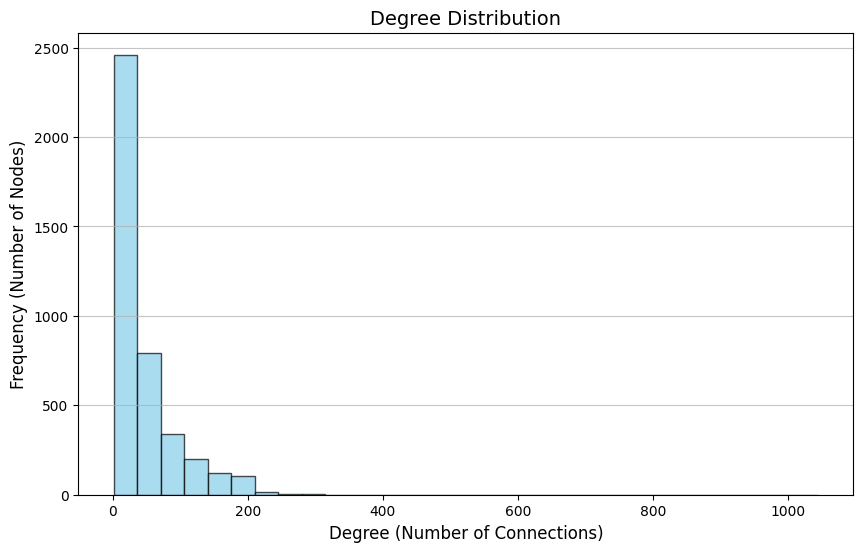

In [10]:
# Plot the degree distribution clearer
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Degree Distribution", fontsize=14)
plt.xlabel("Degree (Number of Connections)", fontsize=12)
plt.ylabel("Frequency (Number of Nodes)", fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

### Adjacency Matrix

In [11]:
adjacency_matrix = G.get_adjacency()
# Print a 10x10 submatrix (first 10 rows and columns)
print("10x10 Submatrix of the adjacency matrix:")
print(adjacency_matrix[:10, :10])  # Slicing to get first 10 rows and columns

10x10 Submatrix of the adjacency matrix:
[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0]]


In [12]:
# Check for self-loops in the graph using igraph
self_loops = [edge for edge in G.es if edge.source == edge.target]

# Print the self-loops
if self_loops:
    print(f"Self-loops found: {len(self_loops)}")
    for loop in self_loops:
        print(f"Self-loop at node {loop.source}")
else:
    print("No self-loops found.")

No self-loops found.


### Edge List

In [13]:
# Print the edge list
print("Edge List:")
print(G.get_edgelist())

Edge List:
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (0, 100), (0, 101), (0, 102), (0, 103), (0, 104), (0, 105), (0, 106), (0, 107), (0, 108), (0, 109), (0, 11

### Adjacency List

In [14]:
# Create adjacency list directly using igraph's built-in method
adjacency_list = G.get_adjlist(mode='ALL')

# Sort the adjacency list by the number of neighbors (degree of nodes)
sorted_adjacency_list = sorted(enumerate(adjacency_list), key=lambda x: len(x[1]), reverse=True)

# Get the top 10 nodes with the most neighbors (degree)
top_10_nodes = sorted_adjacency_list[:10]

# Convert to DataFrame for easy visualization
df = pd.DataFrame(top_10_nodes, columns=["Node", "Neighbors"])
df["Degree"] = df["Neighbors"].apply(len)  # Add a column for the degree (number of neighbors)

# Print the table
df

,Node,Neighbors,Degree
0,107,"[0, 58, 171, 348, 353, 363, 366, 376, 389, 414...",1045
1,1684,"[58, 107, 171, 860, 990, 1171, 1405, 1419, 145...",792
2,1912,"[58, 136, 428, 563, 1465, 1577, 1718, 1913, 19...",755
3,3437,"[567, 698, 857, 862, 1085, 3438, 3439, 3440, 3...",547
4,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",347
5,2543,"[136, 1465, 1577, 1718, 1912, 1917, 1918, 1920...",294
6,2347,"[1465, 1577, 1912, 1917, 1918, 1920, 1925, 192...",291
7,1888,"[107, 897, 906, 916, 921, 925, 927, 934, 946, ...",254
8,1800,"[107, 526, 906, 916, 922, 925, 934, 946, 947, ...",245
9,1663,"[107, 906, 916, 921, 925, 926, 927, 932, 934, ...",235


In [15]:
print(adjacency_list)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 2

### Graph Density
Graph density represents the ratio between the edges present in a graph and the maximum number of edges that the graph can contain.
#### Graph Density Formula

For an **undirected graph**:

$$
D = \frac{2 \times E}{V \times (V - 1)}
$$

Where:
- \( D \) is the **density** of the graph,
- \( E \) is the number of **edges** in the graph,
- \( V \) is the number of **vertices** (nodes) in the graph.

In [16]:
# Calculate the density of the graph
density = G.density()

# Print the density of the graph
print(f"Graph Density = {density}")

Graph Density = 0.010819963503439287


The graph said to be dense graph if the number of edges is close to the maximum possible number of edges.
The density value of 0.0108 that obtained indicates that the graph is very sparse.

### Clustering coffiecent

##### 1. **Local Clustering Coefficient**
The local clustering coefficient \( C(v) \) for a node \( v \) is given by:

$$
C(v) = \frac{2 \times \text{Number of edges between the neighbors of } v}{k_v(k_v - 1)}
$$

##### 2. **Global Clustering Coefficient (Transitivity)**
The global clustering coefficient \( C_G \) is given by:

$$
C_G = \frac{\text{Number of triangles in the graph}}{\text{Number of connected triplets of nodes}}
$$

#### **Key Differences**

| **Property**                  | **Local Clustering Coefficient**              | **Global Clustering Coefficient**               |
|-------------------------------|-----------------------------------------------|-----------------------------------------------|
| **Definition**                 | Measures the clustering around a specific node. | Measures the overall clustering of the graph.   |
| **Calculation**                | Based on the node’s direct neighbors.         | Average of local clustering coefficients of all nodes. |
| **Focus**                      | Node-specific.                               | Network-wide measure.                         |
| **Value Range**                | 0 to 1.                                      | 0 to 1.                                        |
| **Interpretation**             | High value means dense local clustering around a node. | High value indicates a highly clustered network overall. |

Number of nodes with a clustering coefficient of 1: 267
Number of nodes with a clustering coefficient of 0: 76
Node 860 has a clustering coefficient of 0 and degree of 2
Nodes with clustering coefficient = 1 sorted by degree:
Node 135 with degree 10 and clustering coefficient 1.0
Node 309 with degree 10 and clustering coefficient 1.0
Node 78 with degree 9 and clustering coefficient 1.0


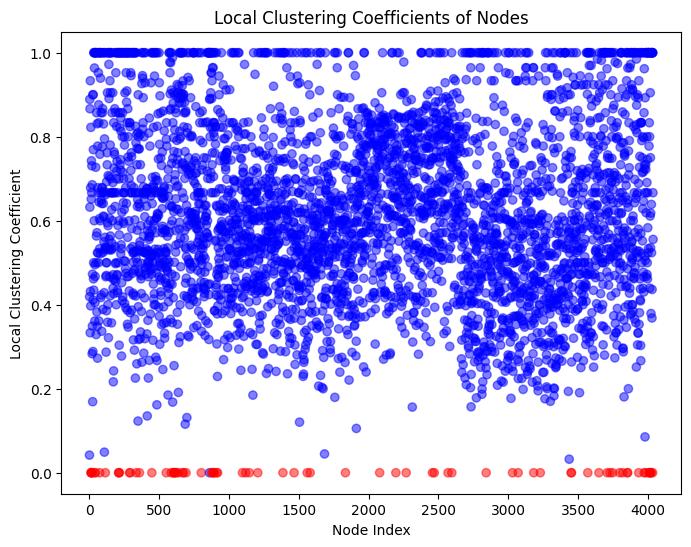

In [17]:
# Calculate the local clustering coefficients for all nodes
local_clustering_coeffs = G.transitivity_local_undirected()

# Replace NaN values with 0 for local clustering coefficients
local_clustering_coeffs = [0 if np.isnan(coeff) else coeff for coeff in local_clustering_coeffs]

# Count the number of nodes with clustering coefficient equal to 1
num_nodes_with_clustering_1 = sum(1 for coeff in local_clustering_coeffs if coeff == 1)
num_nodes_with_clustering_0 = sum(1 for coeff in local_clustering_coeffs if coeff == 0)

# Print the result
print(f"Number of nodes with a clustering coefficient of 1: {num_nodes_with_clustering_1}")
print(f"Number of nodes with a clustering coefficient of 0: {num_nodes_with_clustering_0}")
# Iterate over nodes and print those with clustering coefficient = 1 and degree > 1

for node in range(G.vcount()):
    if local_clustering_coeffs[node] == 0 and degrees[node] > 1:
        print(f"Node {node} has a clustering coefficient of 0 and degree of {degrees[node]}")

# Create a list of nodes with clustering coefficient 1
nodes_with_clustering_1 = [
    (node, degrees[node]) for node in range(G.vcount()) if local_clustering_coeffs[node] == 1
]

# Sort the nodes with clustering coefficient 1 by their degree in descending order
sorted_nodes = sorted(nodes_with_clustering_1, key=lambda x: x[1], reverse=True)

# Print the sorted nodes with clustering coefficient = 1
print("Nodes with clustering coefficient = 1 sorted by degree:")
for node, degree in sorted_nodes[:3]:
    print(f"Node {node} with degree {degree} and clustering coefficient {local_clustering_coeffs[node]}")

# Assign colors to nodes: Red if degree is 1, Blue otherwise
node_colors = ['red' if degrees[i] == 1 else 'blue' for i in range(len(local_clustering_coeffs))]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(local_clustering_coeffs)), local_clustering_coeffs, color=node_colors, alpha=0.5)

# Add labels and title
plt.xlabel('Node Index')
plt.ylabel('Local Clustering Coefficient')
plt.title('Local Clustering Coefficients of Nodes')

# Show the plot
plt.show()

In [18]:
# Calculate the average local clustering coefficient
average_local_clustering_coeff = sum(local_clustering_coeffs) / G.vcount()

# Print the average local clustering coefficient
print(f"Average Local Clustering Coefficient = {average_local_clustering_coeff}")

Average Local Clustering Coefficient = 0.6055467186200871


In [19]:
# Calculate the global clustering coefficient (transitivity)
global_clustering = G.transitivity_undirected()

print(f"Global Clustering Coefficient (Transitivity): {global_clustering}")

Global Clustering Coefficient (Transitivity): 0.5191742775433075


A Global Clustering Coefficient (Transitivity) of 0.519 suggests that the network consists of clusters or tightly-knit groups (cliques or communities), but the entire network is not a single unified community. 

### Longest Shortest Path (Diameter)

In [20]:
# Calculate the diameter
diameter_length = G.diameter(directed=False)
print(f"The diameter of the graph is: {diameter_length}")

# Get the nodes involved in the longest shortest path
diameter_path = G.get_diameter(directed=False)
print(f"The longest shortest path (diameter path) is: {diameter_path}")

The diameter of the graph is: 8
The longest shortest path (diameter path) is: [687, 686, 698, 3437, 567, 414, 594, 3980, 3981]


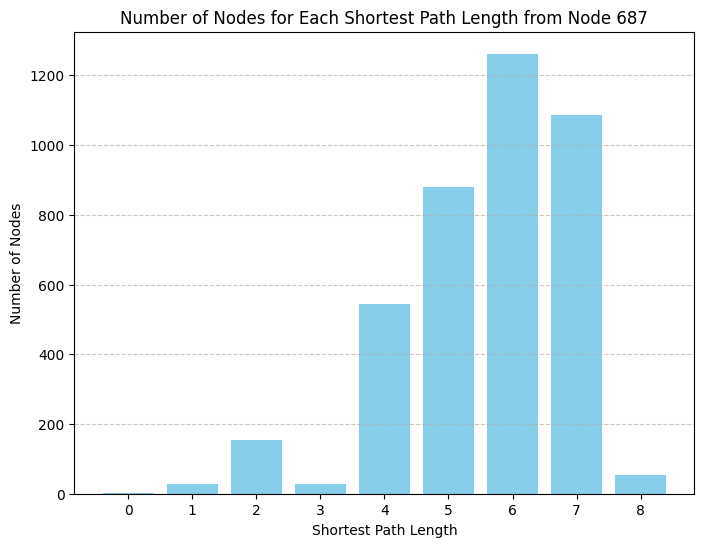

In [21]:
# Get shortest path lengths from node 687 to all other nodes
shortest_path_lengths = G.distances(source=687, mode="ALL")[0]

# Group nodes by their path lengths
length_groups = {}

for target, length in enumerate(shortest_path_lengths):
    if length not in length_groups:
        length_groups[length] = []
    length_groups[length].append(target)

# Count the number of nodes for each length
lengths = list(length_groups.keys())
node_counts = [len(nodes) for nodes in length_groups.values()]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(lengths, node_counts, color='skyblue')

# Customize the chart
plt.title('Number of Nodes for Each Shortest Path Length from Node 687')
plt.xlabel('Shortest Path Length')
plt.ylabel('Number of Nodes')
plt.xticks(lengths)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()

### AVG shortest path

In [ ]:
# Calculate the shortest path lengths between all pairs of nodes (distance matrix)
path_lengths = G.distances()

# Flatten the matrix
finite_lengths = [length for row in path_lengths for length in row]

E_max = G.vcount() * (G.vcount()-1) // 2

# Compute the average shortest path length
avg_shortest_path_length =( 1 /(2*E_max)) * (sum(finite_lengths))

print("Average Shortest Path Length:", avg_shortest_path_length)

Average Shortest Path Length: 3.692506849696391


## Community Detection

### Modularity Rule in Undirected Networks

**Modularity** is a measure used to evaluate the quality of a division of a network into communities (or clusters). The modularity score quantifies how well a given partition of the network reflects the structure of the graph in terms of dense connections within communities and sparse connections between communities. 

##### **Modularity Formula for Undirected Networks**

For an undirected network, the modularity \( Q \) for a given community partition is defined as:

$$
Q = \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i, c_j)
$$

### Louvain Algorithm for Community Detection

The **Louvain algorithm** is a widely used method for detecting communities in networks. It maximizes **modularity**, identifying groups of nodes that are more densely connected to each other than to the rest of the network. The algorithm operates in iterative phases to optimize community structure.

#### **Steps of the Louvain Algorithm**

##### 1. **Initialization (Assign Each Node to Its Own Community)**  
- Each node is initially assigned to its own community.  
- The modularity of the network is computed to assess the quality of the partition.

##### 2. **Local Optimization of Communities (Phase 1)**  
- For each node, the algorithm evaluates the modularity gain achieved by moving the node to the community of each of its neighbors.  
- The node is moved to the community that results in the largest increase in modularity.  
- This process is repeated for all nodes until no further modularity improvement is possible.

##### 3. **Community Aggregation (Phase 2)**  
- Communities identified in the first phase are aggregated into "super-nodes."  
- The graph is reduced to a smaller graph where each "super-node" represents a community. Edges between communities are weighted based on the sum of edges between nodes in the original graph.

##### 4. **Repetition**  
- The two phases (local optimization and aggregation) are repeated on the reduced graph.  
- This iterative process continues until modularity can no longer be improved.

### **Advantages**
- **Efficiency**: Scales well to large networks due to its hierarchical structure.  
- **High Modularity**: Produces partitions with high modularity, revealing meaningful communities.  
- **Hierarchical Communities**: The aggregation process creates a hierarchy of communities, enabling analysis at different levels of granularity.

Community 0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,

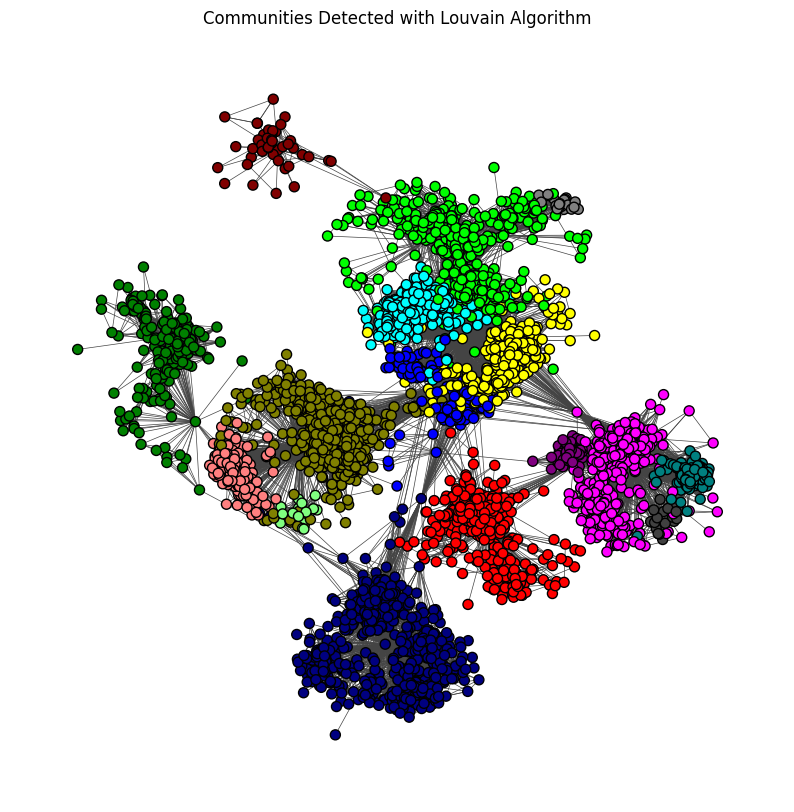

In [23]:
# Detect communities using the Louvain algorithm
communities = G.community_multilevel()

# Print communities
for i, community in enumerate(communities):
    print(f"Community {i}: {community}")

# Assign colors to communities
color_palette = drawing.colors.ClusterColoringPalette(len(communities))
# Assign colors to communities in the original graph
G.vs['color'] = [color_palette[i] for i in communities.membership]

# Set the seed for reproducibility
random.seed(42)
# Use the community layout
layout = G.layout("fr")  # Force-directed layout
community_layout = G.layout_kamada_kawai()  # Kamada-Kawai layout

# Plot the graph with the community layout
fig, ax = plt.subplots(figsize=(10, 10))
plot(G, target=ax, layout=layout, vertex_color=G.vs['color'], vertex_size=10, edge_width=0.5)

plt.title("Communities Detected with Louvain Algorithm")
plt.show()

#### Aggregating Communities

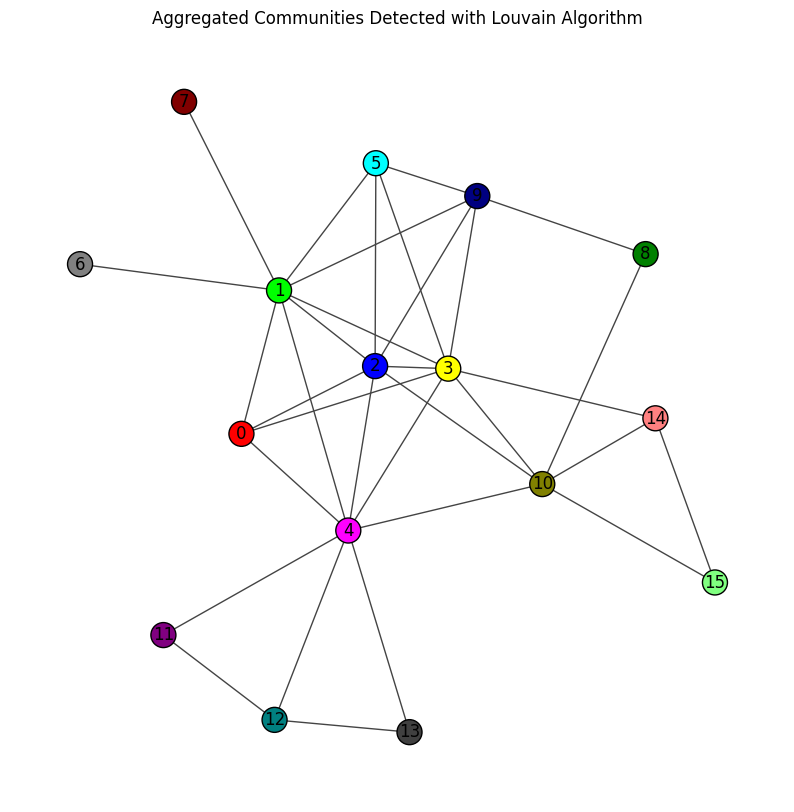

In [24]:
# Create a new graph for the aggregated communities
# Each community is represented by a single node
aggregated_graph = Graph()

# Add nodes for each community
aggregated_graph.add_vertices(len(communities))

# Create a mapping from the original graph's nodes to the new aggregated nodes
node_to_community = {}
for i, community in enumerate(communities):
    for node in community:
        node_to_community[node] = i

# Add edges between communities based on the original graph
for edge in G.get_edgelist():
    node1, node2 = edge
    community1 = node_to_community[node1]
    community2 = node_to_community[node2]
    
    if community1 != community2:  # Add an edge between the communities if they are different
        # Check if the edge already exists to avoid duplicates
        if not aggregated_graph.are_adjacent(community1, community2): #are connected?
            aggregated_graph.add_edge(community1, community2)

# Assign colors to the aggregated communities (same as before)
color_palette = drawing.colors.ClusterColoringPalette(len(communities))
aggregated_graph.vs['color'] = [color_palette[i] for i in range(len(communities))]

# Assign community numbers as labels
aggregated_graph.vs['label'] = [str(i) for i in range(len(communities))]

# Set the seed for reproducibility
random.seed(42)

# Use the community layout
layout = aggregated_graph.layout("kk")  # kk layout for aggregated graph

# Plot the aggregated graph with the community layout
fig, ax = plt.subplots(figsize=(10, 10))
plot(aggregated_graph, target=ax, layout=layout, vertex_color=aggregated_graph.vs['color'], vertex_size=25, edge_width=1,
        vertex_label=aggregated_graph.vs['label'])

plt.title("Aggregated Communities Detected with Louvain Algorithm")
plt.show()


In [25]:
# Calculate closeness centrality for all nodes in the aggregated graph
closeness_centrality = aggregated_graph.closeness()

# Print the closeness centrality for each node
print("Closeness Centrality:")
for idx, value in enumerate(closeness_centrality):
    print(f"Node {idx}: {value}")

Closeness Centrality:
Node 0: 0.5357142857142857
Node 1: 0.6521739130434783
Node 2: 0.6521739130434783
Node 3: 0.6818181818181818
Node 4: 0.6818181818181818
Node 5: 0.5
Node 6: 0.40540540540540543
Node 7: 0.40540540540540543
Node 8: 0.4411764705882353
Node 9: 0.5172413793103449
Node 10: 0.5769230769230769
Node 11: 0.42857142857142855
Node 12: 0.4411764705882353
Node 13: 0.42857142857142855
Node 14: 0.46875
Node 15: 0.38461538461538464


In [26]:
# Calculate betweenness centrality for all nodes in the aggregated graph
betweenness_centrality = aggregated_graph.betweenness()

# Print the betweenness centrality for each node
print("Betweenness Centrality:")
for idx, value in enumerate(betweenness_centrality):
    print(f"Node {idx}: {value}")

Betweenness Centrality:
Node 0: 0.0
Node 1: 30.499999999999996
Node 2: 7.416666666666665
Node 3: 17.500000000000004
Node 4: 39.0
Node 5: 0.0
Node 6: 0.0
Node 7: 0.0
Node 8: 0.5833333333333334
Node 9: 5.5
Node 10: 19.916666666666664
Node 11: 0.0
Node 12: 0.5
Node 13: 0.0
Node 14: 2.083333333333333
Node 15: 0.0


# 1. Centrality Measures

In [27]:
# Calculate degree centrality
degree_centrality = G.degree()

# Create a list of (node, degree centrality) pairs
degree_centrality_pairs = [(node, degree) for node, degree in enumerate(degree_centrality)]

# Sort nodes by degree centrality in descending order
sorted_degree_centrality = sorted(degree_centrality_pairs, key=lambda x: x[1], reverse=True)

# Get the top 4 nodes
top_degree_nodes = sorted_degree_centrality[:4]

# Print the top 4 nodes with the highest degree centrality
print("Top 4 Nodes by Degree Centrality:")
for node, centrality in top_degree_nodes:
    print(f"Node {node}: Degree Centrality {centrality}")

Top 4 Nodes by Degree Centrality:
Node 107: Degree Centrality 1045
Node 1684: Degree Centrality 792
Node 1912: Degree Centrality 755
Node 3437: Degree Centrality 547


In [37]:
# To get the nodes with the lowest degree centrality (bottom 4 nodes)
lowest_degree_nodes = sorted_degree_centrality[-4:]

# Print the bottom 4 nodes with the lowest degree centrality
print("Bottom 4 Nodes by Degree Centrality:")
for node, centrality in lowest_degree_nodes:
    print(f"Node {node}: Degree Centrality {centrality}")


Bottom 4 Nodes by Degree Centrality:
Node 4015: Degree Centrality 1
Node 4022: Degree Centrality 1
Node 4024: Degree Centrality 1
Node 4035: Degree Centrality 1


<Figure size 800x500 with 0 Axes>

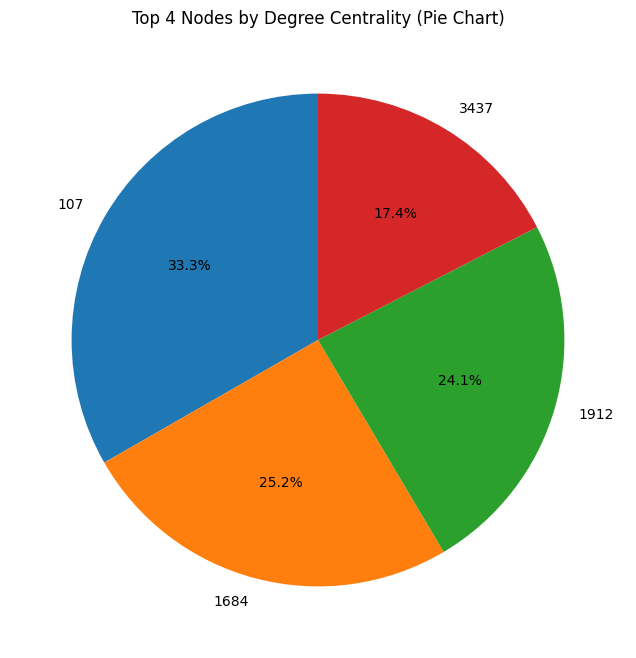

In [28]:
# Visualization 1: Pie Chart
plt.figure(figsize=(8, 5))
nodes, centralities = zip(*top_degree_nodes)
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    centralities,
    labels=nodes,
    autopct='%1.1f%%',
    startangle=90,
)
plt.title('Top 4 Nodes by Degree Centrality (Pie Chart)')
plt.show()

# 2. Eigenvector Centrality

In [29]:
# Calculate eigenvector centrality
eigenvector_centrality = G.eigenvector_centrality()

# Create a list of (node, eigenvector centrality) pairs
eigenvector_centrality_pairs = [(node, eig) for node, eig in enumerate(eigenvector_centrality)]

# Sort nodes by eigenvector centrality in descending order
sorted_eigenvector_centrality = sorted(eigenvector_centrality_pairs, key=lambda x: x[1], reverse=True)

# Get the top 4 nodes
top_eigenvector_nodes = sorted_eigenvector_centrality[:4]

# Print the top 4 nodes with the highest eigenvector centrality
print("Top 4 Nodes by Eigenvector Centrality:")
for node, centrality in top_eigenvector_nodes:
    print(f"Node {node}: Eigenvector Centrality {centrality}")

Top 4 Nodes by Eigenvector Centrality:
Node 1912: Eigenvector Centrality 1.0
Node 2266: Eigenvector Centrality 0.9117190175727723
Node 2206: Eigenvector Centrality 0.9019626322184255
Node 2233: Eigenvector Centrality 0.8927488203018603


In [ ]:
buttom_eigenvector_nodes = sorted_eigenvector_centrality[-4:]

# Print the buttom 4 nodes with the highest eigenvector centrality
print("buttom 4 Nodes by Eigenvector Centrality:")
for node, centrality in buttom_eigenvector_nodes:
    print(f"Node {node}: Eigenvector Centrality {centrality}")

buttom 4 Nodes by Eigenvector Centrality:
Node 775: Eigenvector Centrality 3.8347323940714905e-13
Node 749: Eigenvector Centrality 3.8347253498509556e-13
Node 692: Eigenvector Centrality 3.8096293079210333e-13
Node 801: Eigenvector Centrality 3.8096218614121935e-13


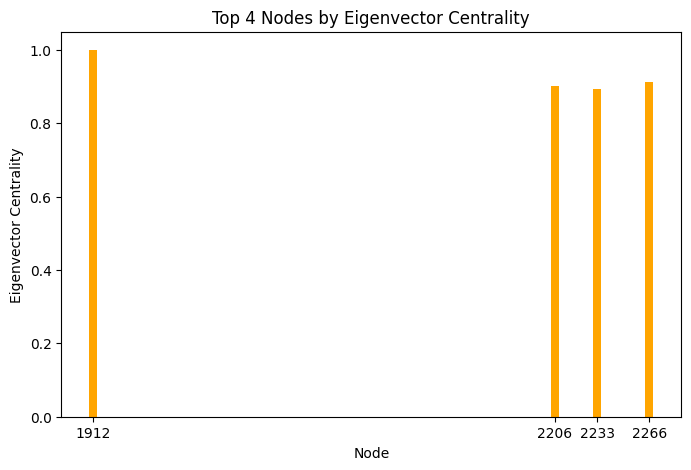

In [30]:
# Visualization 2: Eigenvector Centrality Bar Chart
plt.figure(figsize=(8, 5))
eig_nodes, eig_values = zip(*top_eigenvector_nodes)
plt.bar(eig_nodes, eig_values, color='orange',width=5)
plt.title('Top 4 Nodes by Eigenvector Centrality')
plt.xlabel('Node')
plt.ylabel('Eigenvector Centrality')
plt.xticks(eig_nodes)
plt.show()

# 3. Betweenness Centrality

In [31]:
# Calculate betweenness centrality
betweenness_centrality = G.betweenness()

# Create a list of (node, betweenness centrality) pairs
betweenness_centrality_pairs = [(node, bet) for node, bet in enumerate(betweenness_centrality)]

# Sort nodes by betweenness centrality in descending order
sorted_betweenness_centrality = sorted(betweenness_centrality_pairs, key=lambda x: x[1], reverse=True)


In [32]:
# Print the top 4 nodes with the highest betweenness centrality
print("Top 4 Nodes by Betweenness Centrality:")
top_nodes = sorted_betweenness_centrality[:4]
for node, centrality in top_nodes:
    print(f"Node {node}: Betweenness Centrality {centrality}")

Top 4 Nodes by Betweenness Centrality:
Node 107: Betweenness Centrality 3916560.1444407436
Node 1684: Betweenness Centrality 2753286.6869082903
Node 3437: Betweenness Centrality 1924506.1515714861
Node 1912: Betweenness Centrality 1868918.2122567892


In [41]:
# Print the buttom 4 nodes with the highest betweenness centrality
print("buttom 4 Nodes by Betweenness Centrality:")
buttom_nodes = sorted_betweenness_centrality[-4:]
for node, centrality in buttom_nodes:
    print(f"Node {node}: Betweenness Centrality {centrality}")

buttom 4 Nodes by Betweenness Centrality:
Node 4033: Betweenness Centrality 0.0
Node 4034: Betweenness Centrality 0.0
Node 4035: Betweenness Centrality 0.0
Node 4036: Betweenness Centrality 0.0


# 4. Closeness Centrality

In [33]:
# Calculate closeness centrality
closeness_centrality = G.closeness()

# Create a list of (node, closeness centrality) pairs
closeness_centrality_pairs = [(node, close) for node, close in enumerate(closeness_centrality)]

# Sort nodes by closeness centrality in descending order
sorted_closeness_centrality = sorted(closeness_centrality_pairs, key=lambda x: x[1], reverse=True)

# Print the top 4 nodes with the highest closeness centrality
print("Top 4 Nodes by Closeness Centrality:")
for i in range(4):
    node, centrality = sorted_closeness_centrality[i]
    print(f"Node {node}: Closeness Centrality {centrality}")


Top 4 Nodes by Closeness Centrality:
Node 107: Closeness Centrality 0.45969945355191255
Node 58: Closeness Centrality 0.3974018305284913
Node 428: Closeness Centrality 0.3948371956585509
Node 563: Closeness Centrality 0.3939127889961955


In [42]:
# Print the buttom 4 nodes with the highest betweenness centrality
print("buttom 4 Nodes by Betweenness Centrality:")
buttom_nodes = sorted_closeness_centrality[-4:]
for node, centrality in buttom_nodes:
    print(f"Node {node}: Betweenness Centrality {centrality}")

buttom 4 Nodes by Betweenness Centrality:
Node 775: Betweenness Centrality 0.17826240508564364
Node 841: Betweenness Centrality 0.17826240508564364
Node 692: Betweenness Centrality 0.1782545358230698
Node 801: Betweenness Centrality 0.1782545358230698


Is the graph a tree? False


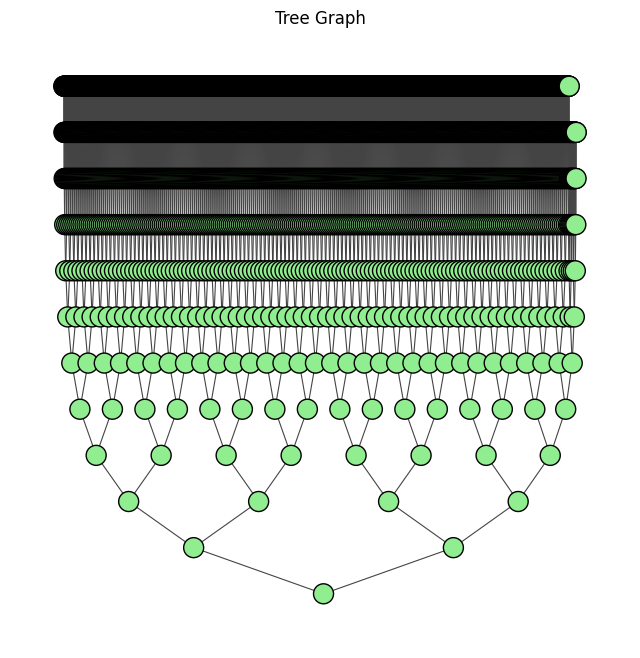

In [34]:
# ----- Check for a Tree -----
# A tree must be connected and have edges = nodes - 1
is_tree = G.is_connected() and G.ecount() == G.vcount() - 1
print(f"Is the graph a tree? {is_tree}")

if not is_tree:
    # Generate a sample tree for comparison
    tree = Graph.Tree(n=G.vcount(), children=2)  # Binary tree layout
    layout = tree.layout("tree")  # Tree layout

    # Visualize the tree
plt.figure(figsize=(8, 8))
plot(tree, layout=layout, target=plt.gca(), vertex_size=20, vertex_color='lightgreen', 
        edge_width=0.8, bbox=(0, 0, 1, 1), margin=50)
plt.title("Tree Graph")
plt.show()

In [35]:
# ----- Check for a Cycle -----
# A cycle graph has all nodes of degree 2
is_cycle = all(degree == 2 for degree in G.degree())
print(f"Is the graph a cycle? {is_cycle}")
  

Is the graph a cycle? False


#### Conclusion

The centrality measures and structural analysis provide crucial insights into the organization and behavior of a network. These tools are widely used across domains such as social network analysis, web page ranking, communication systems, and biological network analysis. By understanding the roles of key nodes in a network, organizations can make more informed decisions regarding resource allocation, communication strategies, and optimization techniques

# Ego network

In [43]:
# Load the ego network 
file_path ="social circles\\facebook\\0.edges"
graph = Graph.Read_Edgelist(file_path, directed=False)

# Print graph summary
print(graph.summary())

IGRAPH U--- 348 5038 -- 


In [51]:
# Check connectivity
is_connected = graph.is_connected()
print("Graph Connected:", is_connected)

Graph Connected: False


In [ ]:
# Calculate the local clustering coefficients for all nodes
local_clustering_coeffs = graph.transitivity_local_undirected()

# Replace NaN values with 0 for local clustering coefficients
local_clustering_coeffs = [0 if np.isnan(coeff) else coeff for coeff in local_clustering_coeffs]

# Count the number of nodes with clustering coefficient equal to 1
num_nodes_with_clustering_1 = sum(1 for coeff in local_clustering_coeffs if coeff == 1)
num_nodes_with_clustering_0 = sum(1 for coeff in local_clustering_coeffs if coeff == 0)

# Print the result
print(f"Number of nodes with a clustering coefficient of 1: {num_nodes_with_clustering_1}")
print(f"Number of nodes with a clustering coefficient of 0: {num_nodes_with_clustering_0}")

Number of nodes with a clustering coefficient of 1: 31
Number of nodes with a clustering coefficient of 0: 63


In [50]:
# Degree of each node
degrees = graph.degree()

# Format the output as a list of (node, degree) pairs
degree_output = [(i, degrees[i]) for i in range(len(degrees))]
print("Node Degrees:")
for node, degree in degree_output[:10]:
    print(f"Node {node}: Degree {degree}")


Node Degrees:
Node 0: Degree 0
Node 1: Degree 32
Node 2: Degree 18
Node 3: Degree 32
Node 4: Degree 18
Node 5: Degree 24
Node 6: Degree 10
Node 7: Degree 38
Node 8: Degree 14
Node 9: Degree 112
